# Bank-German-Customer-Segmentation
### Author github.com/tushar2704


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

Reading the raw data

In [ ]:
# Read the dataset using pandas from the specified file path
data = pd.read_csv(r"C:\Users\79308\Desktop\patel\Cluster\1 Bank\archive (12)\german_credit_data.csv")

A visual control of the first five rows.

In [ ]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


It looks that the first column is simply an index which we can delete. Check how many missing values are in each column and of what data types they are.

In [ ]:
# Drop the first column from the dataset
data.drop(data.columns[0], inplace=True, axis=1)

# Display the number of observations (customers) and columns (attributes) in the dataset
print("Database has {} observations (customers) and {} columns (attributes).".format(data.shape[0], data.shape[1]))

# Display the count of missing values in each column
print("Missing values in each column:\n{}".format(data.isnull().sum()))

# Display the data types of columns in the dataset
print("Columns data types:\n{}".format(data.dtypes))


Database has 1000 obserwations (customers) and 9 columns (attributes).
Missing values in each column:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64
Columns data types:
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


Out of 8 columns 2 contain missing values. Probably these are customers who don’t have one of these two accounts.

Generally, there are 3 numeric variables and 5 categorical ones.

Now, check how many, and what are the possible (unique) values in each categorical column.

In [ ]:
# Calculate the number of unique values for each column in the dataset
n_unique = data.nunique()

# Display the number of unique values for each column
print("Number of unique values:\n{}".format(n_unique))


Number of unique values:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


In [ ]:
# Display unique values in each categorical column
print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col, ":", data[col].unique())


Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


**Exploratory Data Analysis**

Below define a function which will generate plots for three numeric variables with stratification by selected categorical column.

In [ ]:
def scatters(data, h=None, pal=None):
    """
    Generate scatter plots for visualizing relationships between variables.

    Parameters:
        data (DataFrame): The dataset to be visualized.
        h (str): Column for hue (coloring points based on a categorical variable).
        pal (str): Color palette for the plot.
    """
    # Create a 3x1 subplot layout
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))

    # Scatter plot for Credit amount vs. Duration
    sns.scatterplot(x="Credit amount", y="Duration", hue=h, palette=pal, data=data, ax=ax1)

    # Scatter plot for Age vs. Credit amount
    sns.scatterplot(x="Age", y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)

    # Scatter plot for Age vs. Duration
    sns.scatterplot(x="Age", y="Duration", hue=h, palette=pal, data=data, ax=ax3)

    # Adjust layout for better spacing
    plt.tight_layout()


At the beginning let’s look at scatter plots our 3 numerical variables stratified by sex.

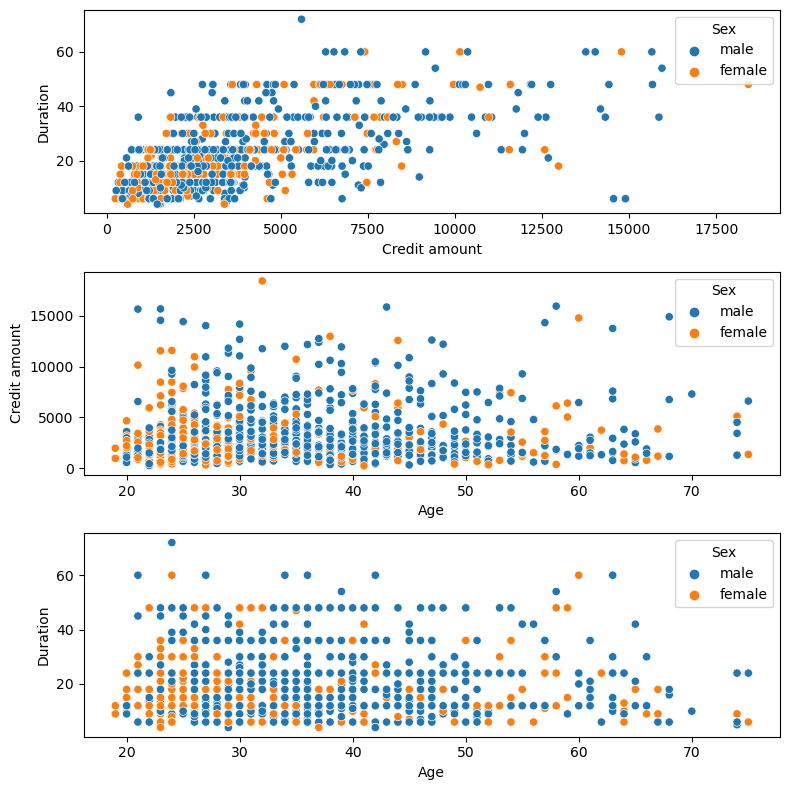

In [ ]:
# Generate scatter plots with 'Sex' as the hue variable
scatters(data, h="Sex")


The general impression is that women tend to be younger than men, however, the top plot shows that there is no clear difference between men and women in terms of amount and duration of the credit. From visual inspection, it seems that there is some positive correlation between duration and amount of credit, what makes sense.

Let’s check the linear correlation between credit amount and duration

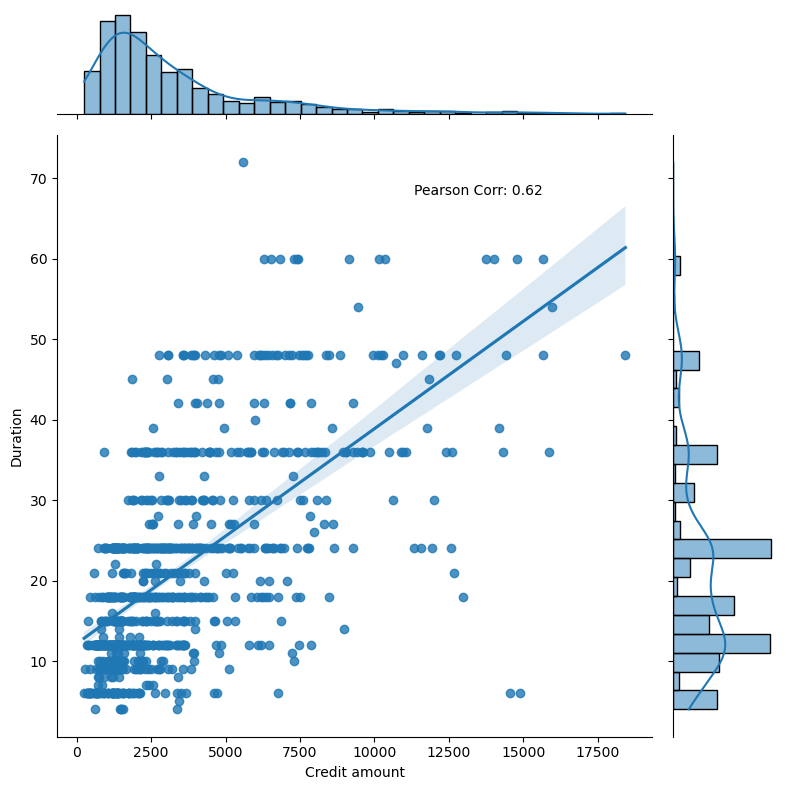

In [ ]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming you have 'data' as your dataset

# Create a joint plot with regression line and annotations
r1 = sns.jointplot(x="Credit amount", y="Duration", data=data, kind="reg", height=8)

# Calculate Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(data["Credit amount"], data["Duration"])

# Annotate the plot with the Pearson correlation coefficient
r1.ax_joint.annotate(f"Pearson Corr: {pearson_corr:.2f}", xy=(0.6, 0.9), xycoords="axes fraction")

# Display the plot
plt.show()



The plot above shows a linear correlation with Pearson value of 0.62 and very small p-value. That make’s sense because usually, people take bigger credits for longer periods.  Below analyse linear regression plots with various categorisations.

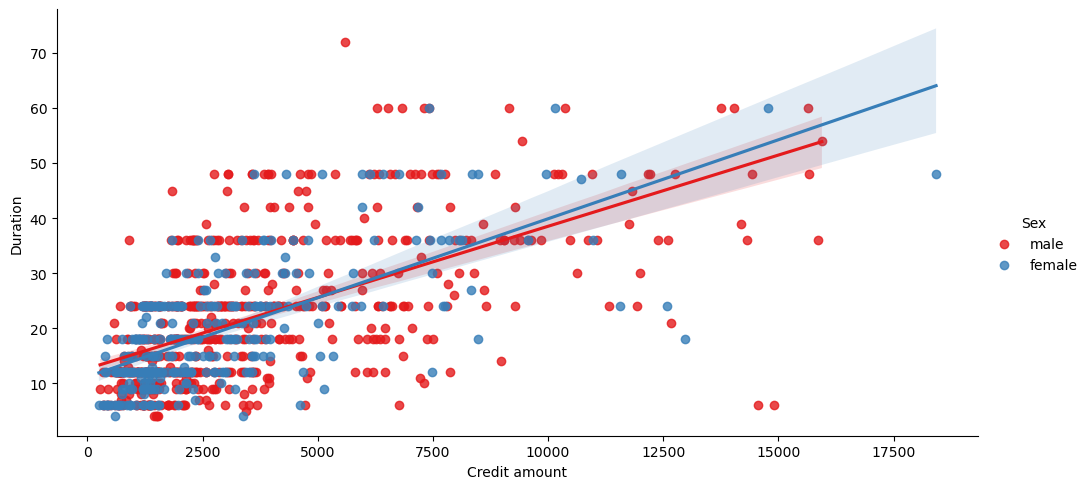

In [ ]:
# Create a linear regression plot with hue by 'Sex'
sns.lmplot(x="Credit amount", y="Duration", hue="Sex", data=data, palette="Set1", aspect=2)

# Display the plot
plt.show()

The plot above indicates that there is no significant difference between men and women.

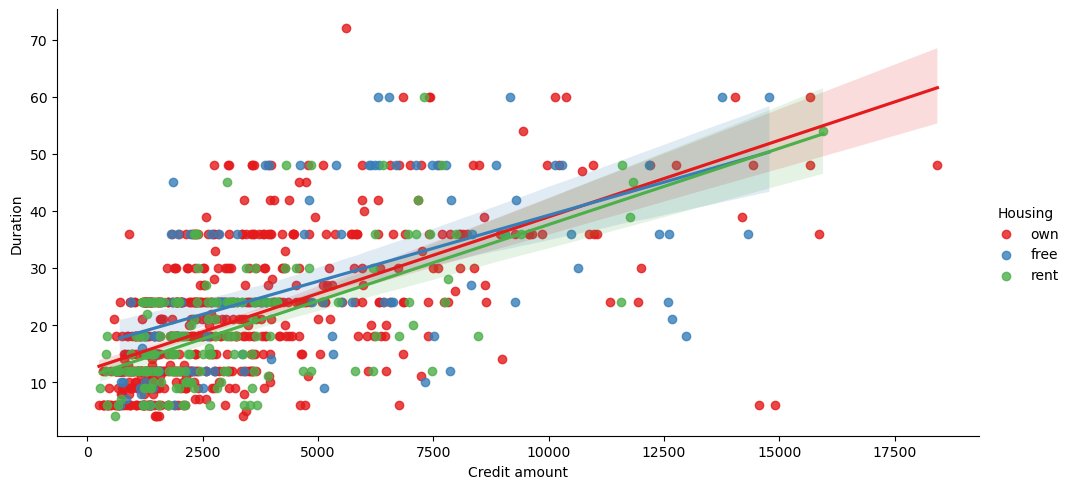

In [ ]:
# Create a linear regression plot with hue by 'Housing'
sns.lmplot(x="Credit amount", y="Duration", hue="Housing", data=data, palette="Set1", aspect=2)

# Display the plot
plt.show()

The plot above shows similarly that there is no diference betwen housing categories.

Below show “business” area where granted the biggest amount of credits.

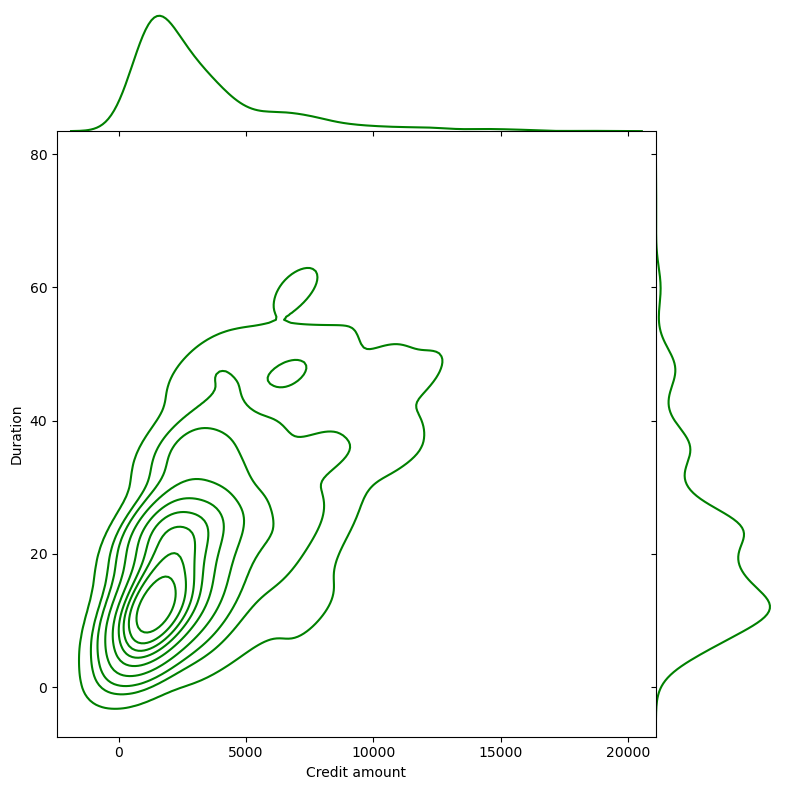

In [ ]:

# Create a linear regression plot with hue by 'Housing'
sns.lmplot(x="Credit amount", y="Duration", hue="Housing", data=data, palette="Set1", aspect=2)

# Display the plot
plt.show()

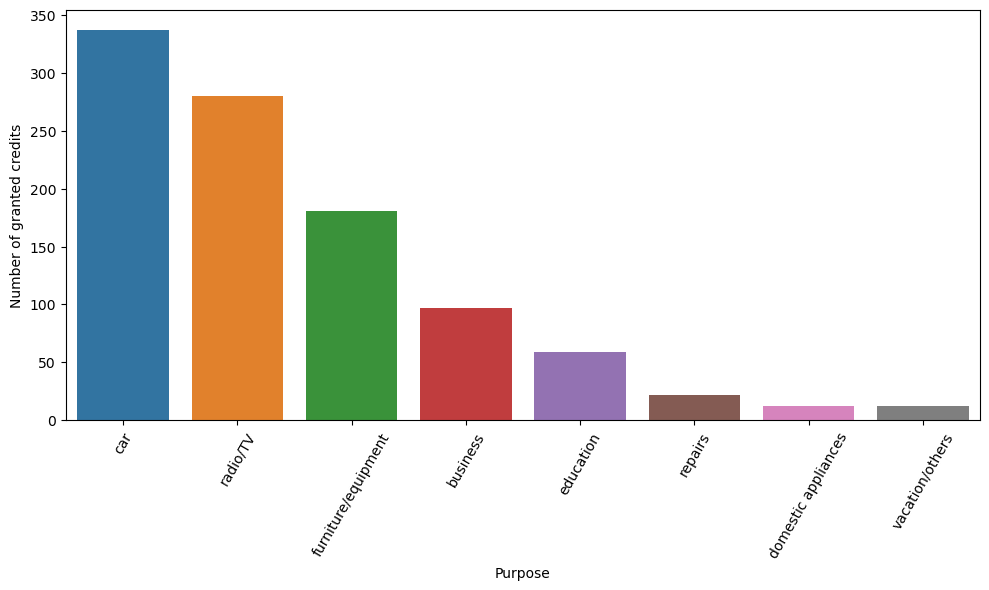

In [ ]:
# Group the data by "Purpose" and count the number of credits for each purpose
n_credits = data.groupby("Purpose")["Age"].count().rename("Count").reset_index()

# Sort purposes by the count of granted credits in descending order
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

# Create a bar plot to visualize the number of granted credits by purpose
plt.figure(figsize=(10, 6))
bar = sns.barplot(x="Purpose", y="Count", data=n_credits)

# Rotate x-axis labels for better readability
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)

# Set y-axis label
plt.ylabel("Number of granted credits")

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

The barplot above shows how many credits were granted for various purposes. Most of credits were granted for car and radio/TV.

Now generate boxplots for detailed analysis of categorical variables.

In [ ]:
def boxes(x, y, h, rotation=45):
    """
    Generate a box plot for visualizing distribution of variables.

    Parameters:
        x (str): Column name for the x-axis.
        y (str): Column name for the y-axis.
        h (str): Column name for hue (coloring boxes based on a categorical variable).
        rotation (int): Rotation angle for x-axis labels.
    """
    # Create a figure and axis for the box plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Generate the box plot with specified parameters
    box = sns.boxplot(x=x, y=y, hue=h, data=data)

    # Rotate x-axis labels for better readability
    box.set_xticklabels(box.get_xticklabels(), rotation=rotation)

    # Adjust layout for better spacing
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()


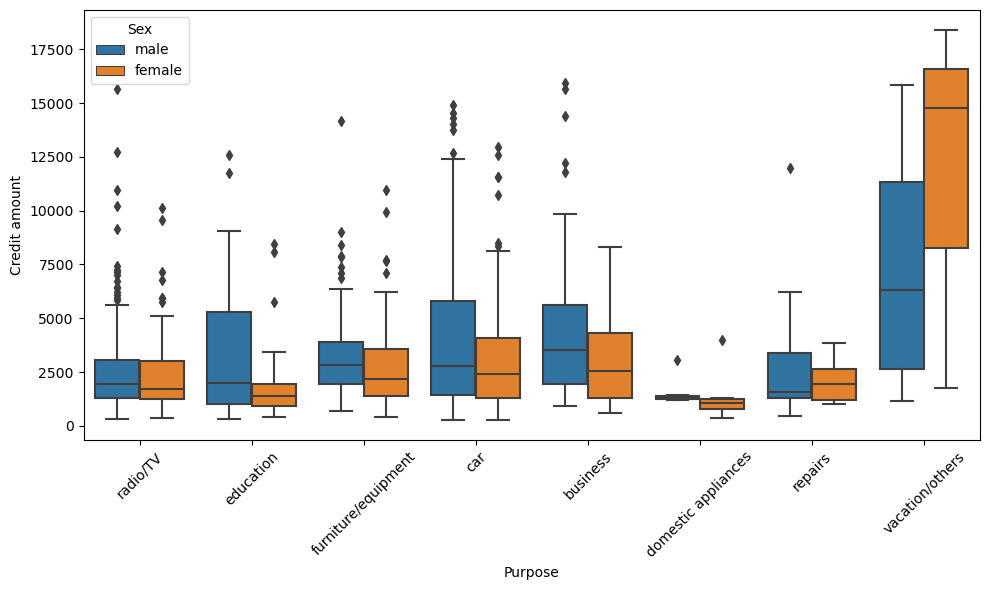

In [ ]:
# Generate a box plot to visualize the distribution of "Credit amount" based on "Purpose" and colored by "Sex"
boxes("Purpose", "Credit amount", "Sex")


The plot above shows that the biggest amounts are taken for vacations/others, the smallest for domestic appliances. Most of them have outliers on the upper side of the boxes (higher amounts). In most of the cases there is no difference between men and women, despite category vacation/others. But one must remember that there was very little number of credits granted in this category.

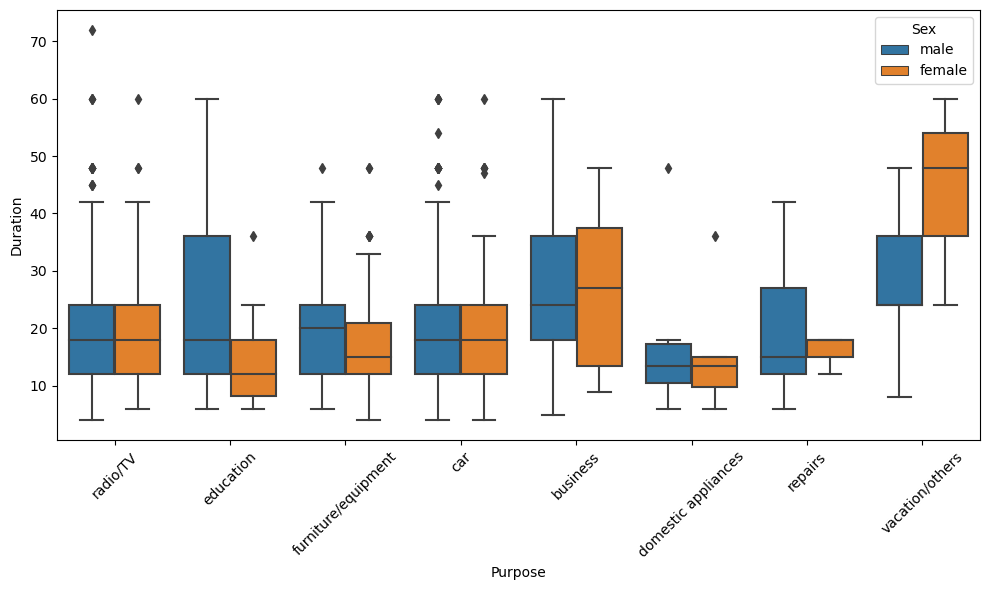

In [ ]:
# Generate a box plot to visualize the distribution of "Duration" based on "Purpose" and colored by "Sex"
boxes("Purpose", "Duration", "Sex")


The boxplot above indicates that generally there is no difference in credit duration between men and women. We can’t see also clear trend between categories with observations that the shortest duration is for domestic appliances.  It makes sense as it is in agreement with insights from the previous graph (credit amount) – in this category, there are the lowest amounts of credits.

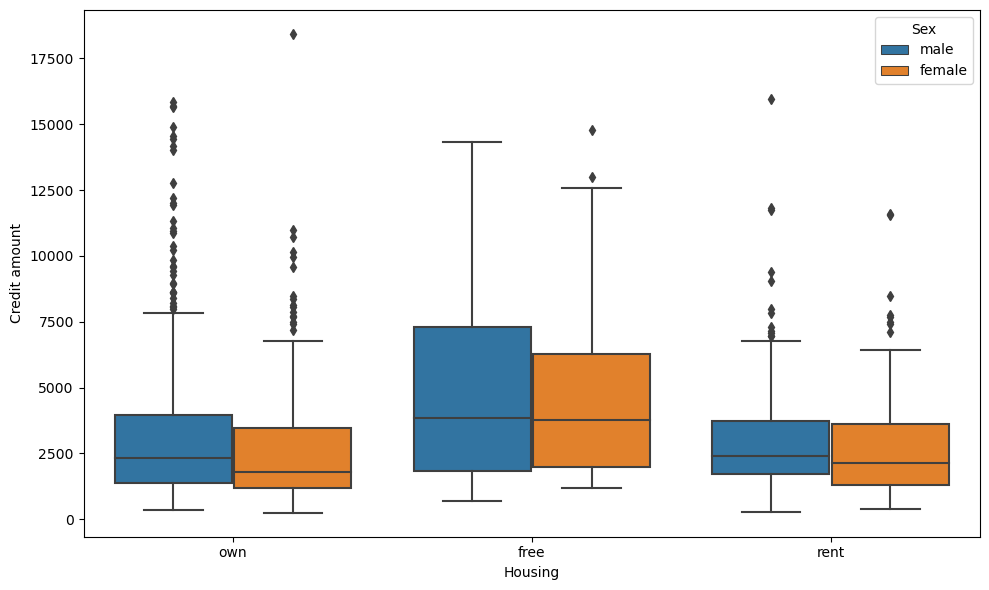

In [ ]:
# Generate a box plot to visualize the distribution of "Credit amount" based on "Housing" and colored by "Sex"
# X-axis labels are not rotated (rotation angle = 0)
boxes("Housing", "Credit amount", "Sex", r=0)


In terms of housing category, there is no big difference despite people having “free” housing tend to take slightly bigger credit amounts.

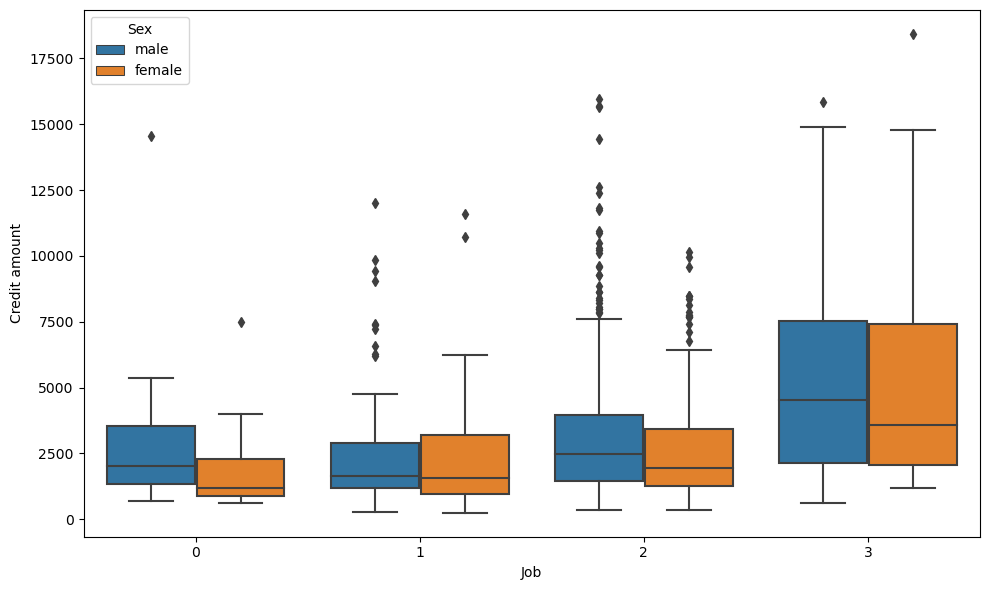

In [ ]:
# Generate a box plot to visualize the distribution of "Credit amount" based on "Job" and colored by "Sex"
# X-axis labels are not rotated (rotation angle = 0)
boxes("Job", "Credit amount", "Sex", r=0)


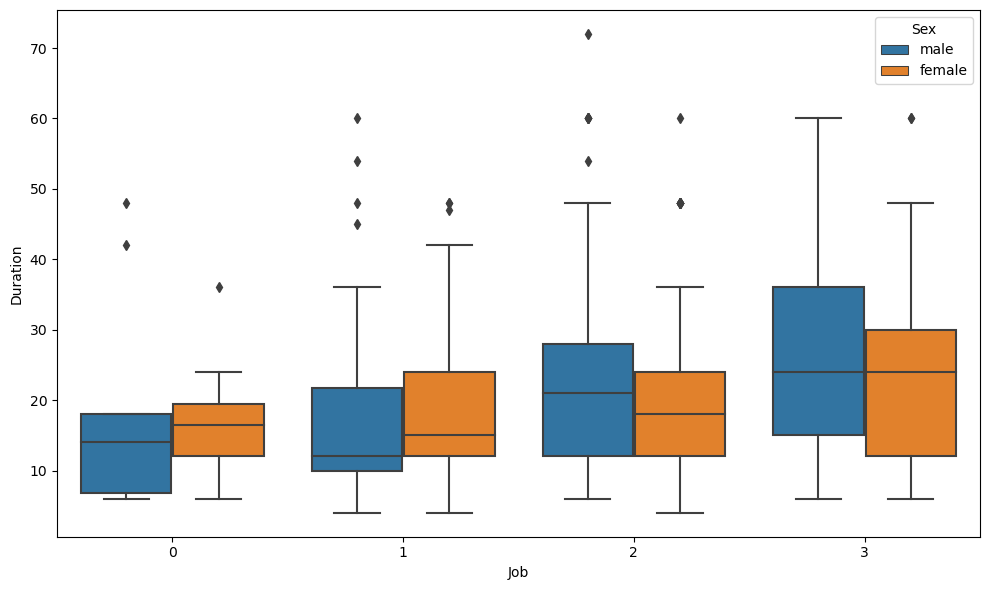

In [ ]:
# Generate a box plot to visualize the distribution of "Duration" based on "Job" and colored by "Sex"
# X-axis labels are not rotated (rotation angle = 0)
boxes("Job", "Duration", "Sex", r=0)


In terms of job category once again there is no difference between men and women, but we can see that job category 3 tends to take bigger credit amounts for longer duration.  

And at the end if someone likes 3D plots here you go.

Text(0.5, 0, 'Age')

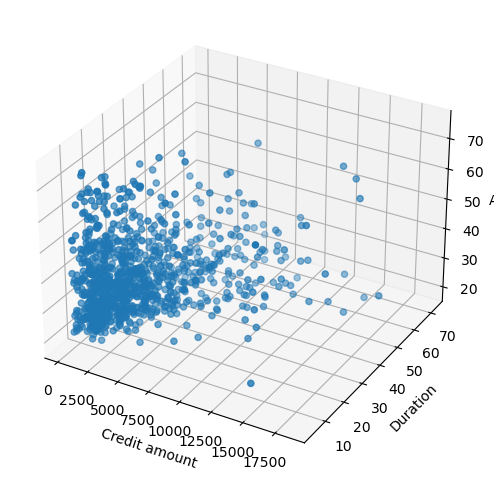

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Credit amount"], data["Duration"], data["Age"])

# Set labels for the x, y, and z axes
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

# Display the 3D scatter plot
plt.show()


**Clustering with KMeans**

For clustering,create a subset containing only numerical variables (Age, Credit amount, Duration).

In [ ]:
# Selecting columns for clustering with k-means
selected_cols = ["Age", "Credit amount", "Duration"]

# Create a subset of the dataset containing only the selected columns
cluster_data = data.loc[:, selected_cols]


create a function which plots three histograms - one for each variable.

In [ ]:
def distributions(df):
    """
    Generate distribution plots for selected variables.

    Parameters:
        df (DataFrame): The dataset containing the variables to be visualized.
    """
    # Create a 3x1 subplot layout
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))

    # Plot distribution of "Age"
    sns.distplot(df["Age"], ax=ax1)

    # Plot distribution of "Credit amount"
    sns.distplot(df["Credit amount"], ax=ax2)

    # Plot distribution of "Duration"
    sns.distplot(df["Duration"], ax=ax3)

    # Adjust layout for better spacing
    plt.tight_layout()


Let's look at the histograms.

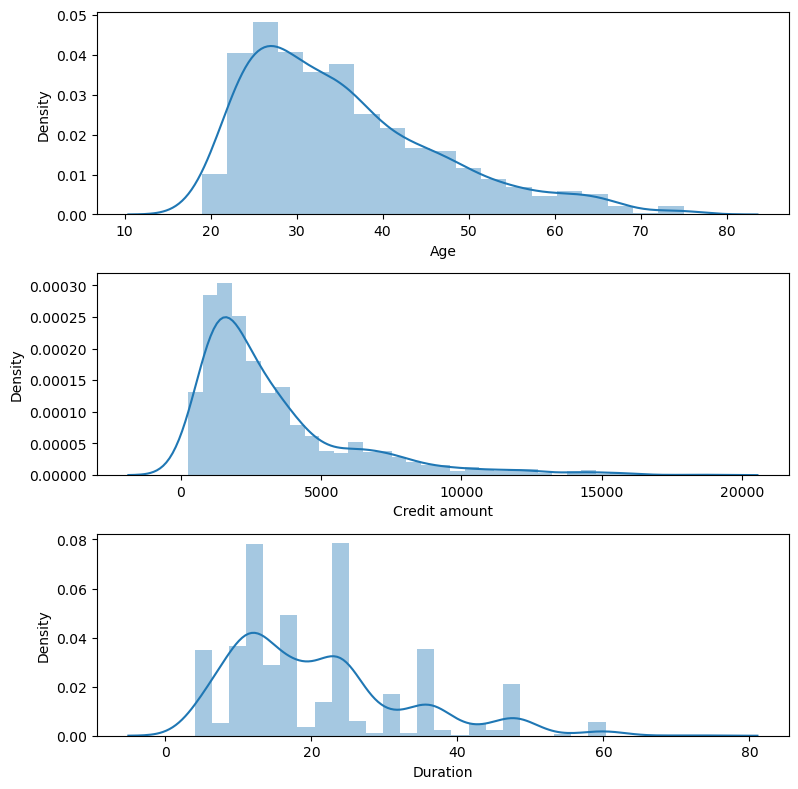

In [ ]:
# Generate distribution plots for the selected variables in the cluster_data
distributions(cluster_data)


We can see that distributions are right-skewed. To obtain better results we should remove the skewness by logarithmic transformation. After that let's see how they look like.

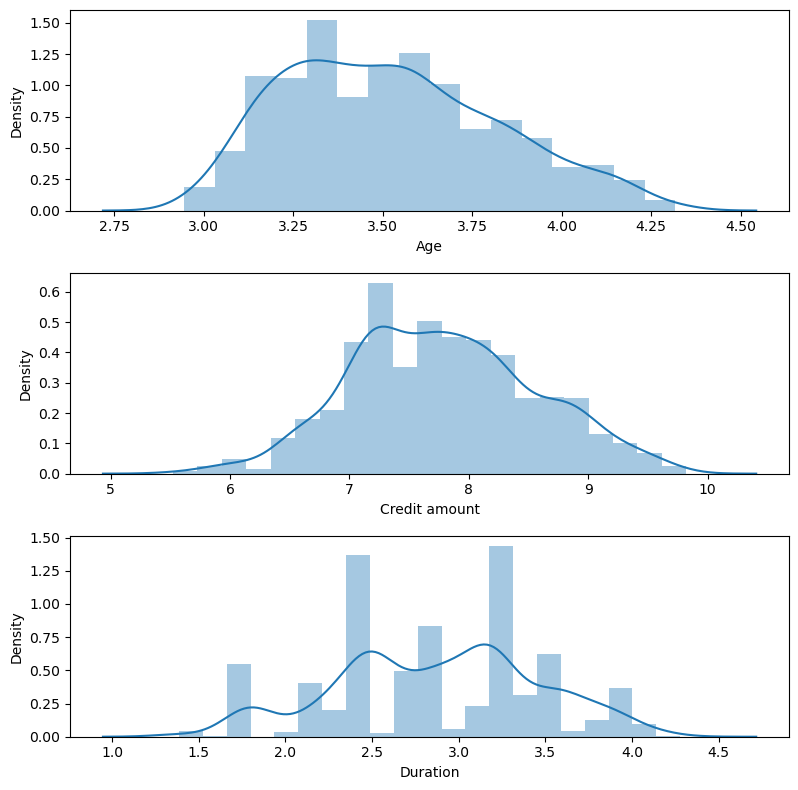

In [ ]:
# Apply logarithmic transformation to the cluster_data
cluster_log = np.log(cluster_data)

# Generate distribution plots for the transformed variables in cluster_log
distributions(cluster_log)


Indeed, the skewness has been eliminated.

The next step will be centering and scaling of variables – it is required by KMeans algorithm.  We will use for that a StandardScaler from sklearn library.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the log-transformed data using the scaler
cluster_scaled = scaler.fit_transform(cluster_log)


I will check how inertia changes for various number of clusters.

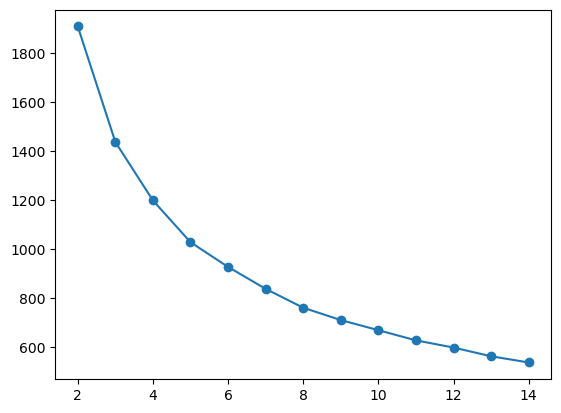

In [ ]:
# List of cluster numbers to explore
clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# List to store the inertia values
inertias = []

# Loop through the cluster range and compute KMeans for each cluster number
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

# Create a plot to visualize the relationship between cluster number and inertia
plt.figure()
plt.plot(clusters_range, inertias, marker='o')


The plot above shows that inertia decreases with increasing number of clusters.

This method allows for assessment of cluster separations and fitting of each observation in its own cluster.  The highest score the better.  I will perform this analysis for various seeds as well.

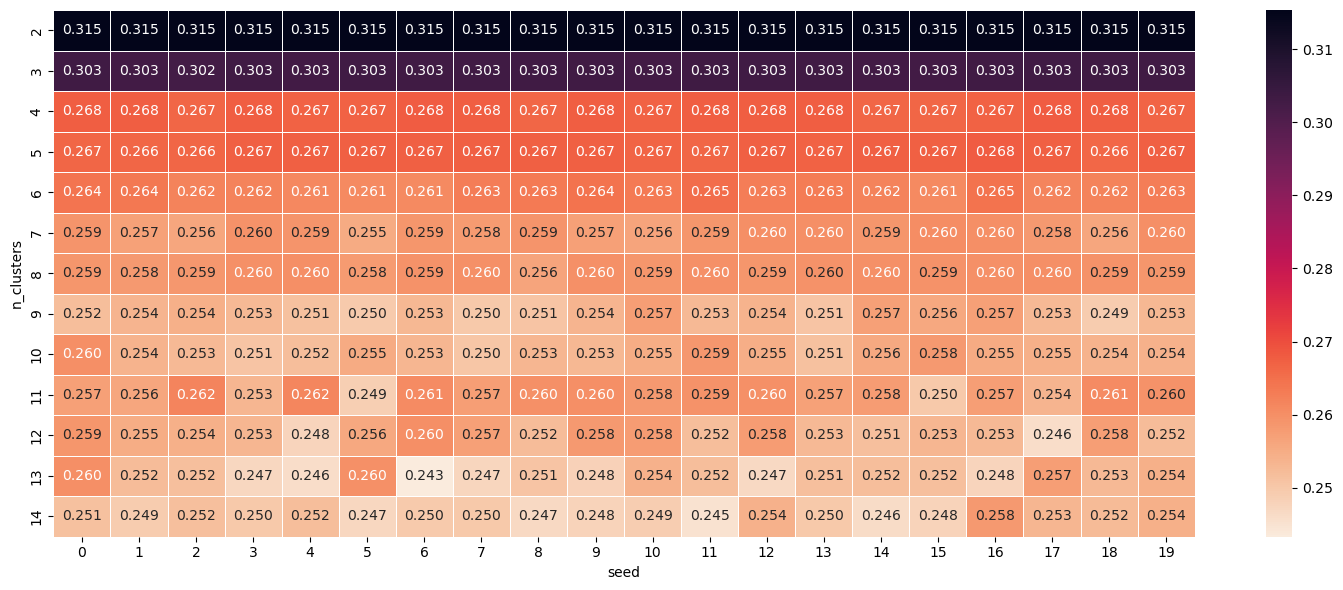

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# List of cluster numbers and random seeds to explore
clusters_range = range(2, 15)
random_range = range(0, 20)

# List to store silhouette score results
results = []

# Loop through cluster numbers and random seeds, calculating silhouette scores
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        results.append([c, r, silhouette_avg])

# Create a DataFrame to store results
result = pd.DataFrame(results, columns=["n_clusters", "seed", "silhouette_score"])

# Create a pivot table for visualization
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed", values="silhouette_score")

# Create a heatmap to visualize silhouette scores
plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()


The heatmap above shows silhouette scores for various combinations of random state and number of clusters. The highest scores are for 2 and 3 clusters and they are relatively insensitive to seed.

Chose 3 clusters to get more insight into data.

In [ ]:
from sklearn.cluster import KMeans

# Perform KMeans clustering with 3 clusters and a specific random seed
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)

# Get the cluster labels assigned by KMeans
labels = pd.DataFrame(kmeans_sel.labels_)

# Assign the cluster labels to the original cluster_data
clustered_data = cluster_data.assign(Cluster=labels)


Below create silhouette graph for 3 clusters in order to visually depict fit of each point within its own cluster (modified code from scikit-learn doc).

For n_clusters = 3  and seed = 19 
The average silhouette_score is : 0.302902483090709


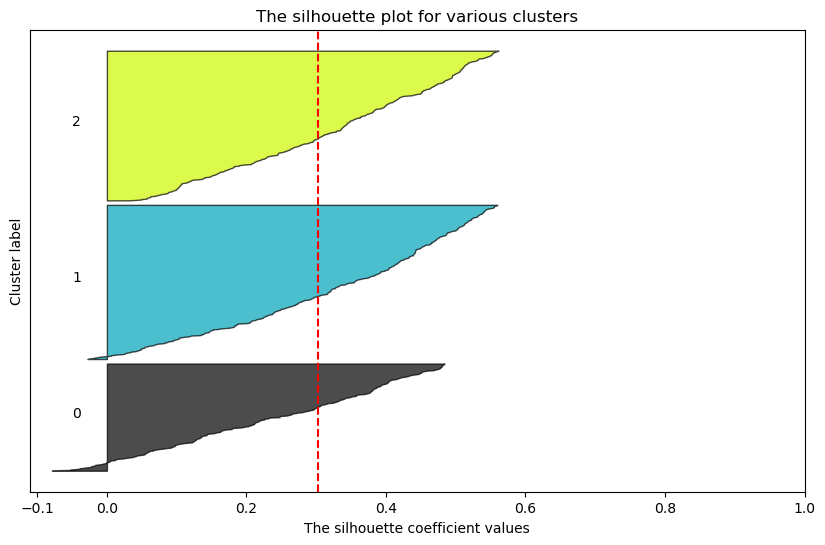

In [ ]:
import matplotlib.cm as cm

# Perform KMeans clustering with 3 clusters and a specific random seed
clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)

# Compute the silhouette score for the clustering
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)

# Print the average silhouette score
print("For n_clusters =", 3, " and seed =", r, "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

# Create a figure and axis for the silhouette plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set the lower y-axis limit for the plot
y_lower = 10

# Loop through each cluster
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Adjust the y_lower for the next plot

# Set y-axis ticks to an empty list
ax1.get_yaxis().set_ticks([])

# Set plot title and labels
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# Add a vertical line to indicate the average silhouette score
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Display the silhouette plot
plt.show()


Define a function showing clusters on the scatter plot.  

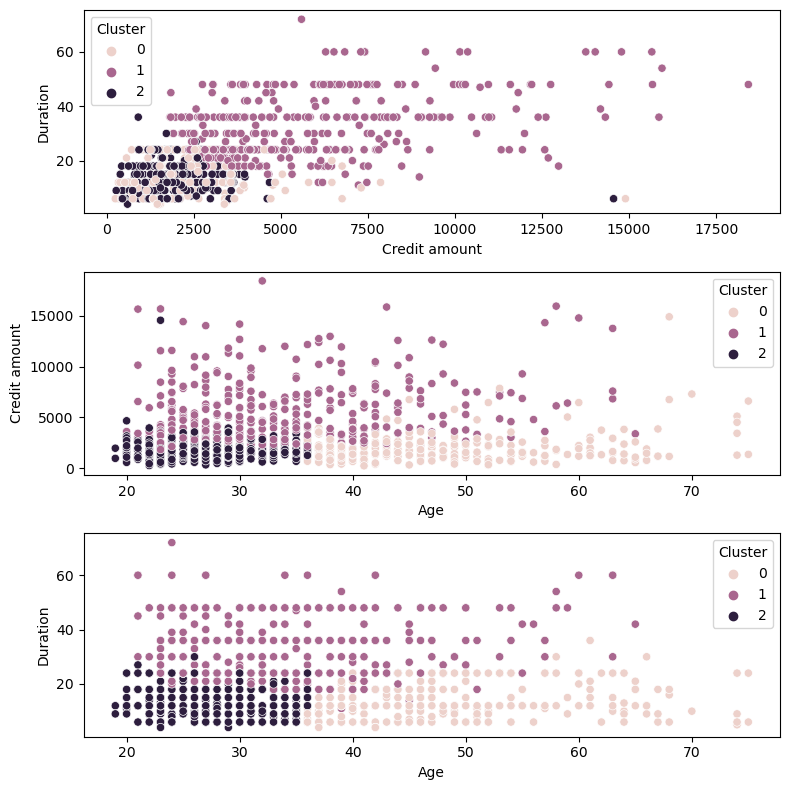

In [ ]:
# Generate scatter plots with cluster coloring based on the 'Cluster' column
scatters(clustered_data, 'Cluster')


Plots above show three created clusters. Two bottom ones show relatively clear separation of clusters, but it is no so evident on the top one.

Generate now a heatmap plot for easier business interpretation of customer segmentation.  

In [ ]:
# Group the clustered data by 'Cluster' and calculate the mean values for each cluster
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)

# Display the resulting grouped data
grouped_km


,Age,Credit amount,Duration
Cluster,,,
0,48.6,1970.5,13.9
1,34.0,5665.4,32.2
2,27.7,1737.5,14.3


Cluster 0 –  lower mean of credit amount, short duration, older customers

Cluster 1 – high mean of credit amount, long duration, middle-aged customers

Cluster 2 - lower mean of credit amount, short duration, young customers

**Clustering with Affinity Propagation**

In this algorithm there are two relevant parameters: preference and dumping. It means that we don’t define upfront number of clusters, algorithm itself chooses their number.
Fix dumping and check number of clusters in function of preference parameter.  

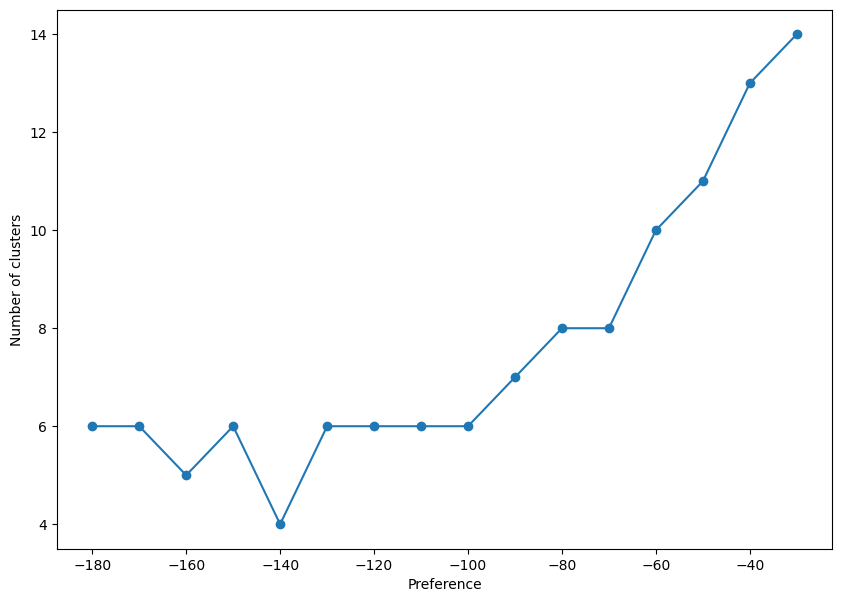

In [ ]:
import numpy as np

# Define a range of preferences for Affinity Propagation
preferences = np.arange(-30, -190, -10)

# List to store the number of clusters for each preference
clusters = []

# Loop through the preferences and fit Affinity Propagation for each preference
for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(cluster_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))

# Create a plot to visualize the relationship between preference and number of clusters
plt.figure(figsize=(10, 7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences, clusters, marker='o')



Together with decreasing value of preference parameter number of clusters goes down as well and levels for very small preference values. Check four clusters option.

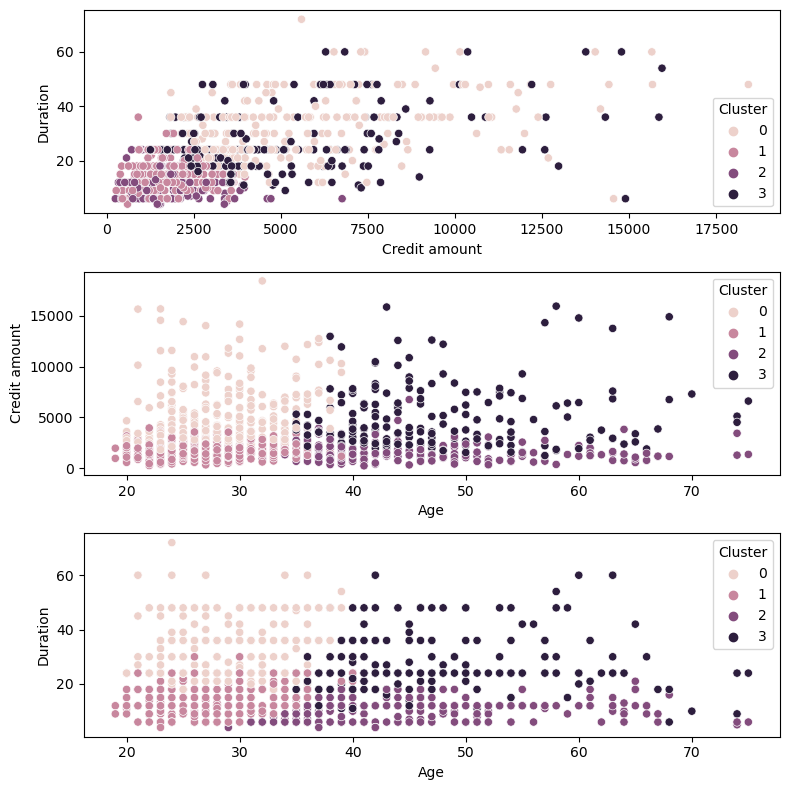

In [ ]:
# Perform Affinity Propagation clustering with specific parameters
af = AffinityPropagation(preference=-140, damping=0.6, verbose=False).fit(cluster_scaled)

# Get the cluster labels assigned by Affinity Propagation
labels_af = pd.DataFrame(af.labels_)

# Calculate the number of clusters obtained
n_clusters_ = len(af.cluster_centers_indices_)

# Assign the cluster labels to the original cluster_data for Affinity Propagation
clustered_data_af = cluster_data.assign(Cluster=labels_af)

# Generate scatter plots with cluster coloring based on the 'Cluster' column for Affinity Propagation
scatters(clustered_data_af, 'Cluster')

# Group the clustered data by 'Cluster' and calculate the mean values for each cluster
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)



In [ ]:
# Group the clustered data (Affinity Propagation) by 'Cluster' and calculate the mean values for each cluster
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)

# Display the resulting grouped data
grouped_af


,Age,Credit amount,Duration
Cluster,,,
0,28.7,5593.7,32.2
1,27.9,1654.3,15.1
2,46.0,1551.7,10.7
3,47.5,4977.9,27.6


Cluster 0 – high mean of credit amount, long duration, younger customers

Cluster 1 – low mean of credit amount, short duration, younger customers

Cluster 2 - low mean of credit amount, short duration, older customers

Cluster 3 - high mean of credit amount, middle-time duration, older customers